# Demand Analysis of Tech-Related Roles in LinkedIn Job Postings

**Author:** Shubh Shukla

**University:** University of Glasgow  

**Course:** BSc. Hons. in Computing Science

**Tools:** Python, Pandas, Matplotlib, Seaborn

## Project Objective
The objective of this project is to analyze LinkedIn job postings to identify demand trends in tech-related roles such as Engineering, Information Technology, Science, Research, and Analyst positions.

The analysis will explore:
- Which tech roles are most in demand
- Salary distribution across tech roles
- Experience level distribution


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Step 1: Load Dataset

The dataset consists of multiple relational CSV files:
- postings.csv → main job information
- job_skills.csv → mapping between job and job category
- skills.csv → job category descriptions
- salaries.csv → compensation details
- industries.csv → industry classification

In [3]:
postings = pd.read_csv("data/postings.csv")
job_skills = pd.read_csv("data/job_skills.csv")
skills = pd.read_csv("data/skills.csv")
salaries = pd.read_csv("data/salaries.csv")
industries = pd.read_csv("data/industries.csv")

print("Postings shape:", postings.shape)
print("Job Skills shape:", job_skills.shape)
print("Skills shape:", skills.shape)
print("Salaries shape:", salaries.shape)
print("Industries shape:", industries.shape)


Postings shape: (123849, 31)
Job Skills shape: (213768, 2)
Skills shape: (35, 2)
Salaries shape: (40785, 8)
Industries shape: (422, 2)


## Dataset Overview

- 123,849 job postings
- 213,768 job-skill mappings
- 35 unique skills
- 40,785 salary records
- 422 industry records

The dataset follows a relational structure:
- postings → main job information
- job_skills → maps job to skill
- skills → skill name mapping
- salaries → compensation details


## Step 2: Data Preparation

The dataset follows a relational structure.  
We must merge multiple tables to create a master dataset.

Steps:
1. Merge job_skills with skills to get job function names
2. Merge result with postings to get job details
3. Keep only relevant columns for analysis


In [4]:
job_skill_merged = job_skills.merge(skills, on="skill_abr", how="left")

job_skill_merged.head()

,job_id,skill_abr,skill_name
0,3884428798,MRKT,Marketing
1,3884428798,PR,Public Relations
2,3884428798,WRT,Writing/Editing
3,3887473071,SALE,Sales
4,3887465684,FIN,Finance


In [5]:
master = job_skill_merged.merge(postings, on="job_id", how="left")

master.head()


,job_id,skill_abr,skill_name,company_name,title,description,max_salary,pay_period,location,company_id,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,3884428798,MRKT,Marketing,ASSOULINE,Public Relations Intern,Assouline is the first luxury brand in the wor...,NaN,HOURLY,New York City Metropolitan Area,391906.0,...,NaN,1.712346e+12,NaN,0.0,INTERNSHIP,USD,BASE_SALARY,41600.0,NaN,NaN
1,3884428798,PR,Public Relations,ASSOULINE,Public Relations Intern,Assouline is the first luxury brand in the wor...,NaN,HOURLY,New York City Metropolitan Area,391906.0,...,NaN,1.712346e+12,NaN,0.0,INTERNSHIP,USD,BASE_SALARY,41600.0,NaN,NaN
2,3884428798,WRT,Writing/Editing,ASSOULINE,Public Relations Intern,Assouline is the first luxury brand in the wor...,NaN,HOURLY,New York City Metropolitan Area,391906.0,...,NaN,1.712346e+12,NaN,0.0,INTERNSHIP,USD,BASE_SALARY,41600.0,NaN,NaN
3,3887473071,SALE,Sales,Renewal by Andersen Metro & Midwest,Outside Sales Consultant,Outside Sales ConsultantRenewal by Andersen - ...,NaN,NaN,Atlanta Metropolitan Area,22292832.0,...,NaN,1.712346e+12,NaN,0.0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
4,3887465684,FIN,Finance,Sandy Spring Bank,Seasonal Teller Trainee - Montgomery County( H...,About Us\n\nAre you someone who seeks opportun...,NaN,NaN,"Olney, MD",20300.0,...,NaN,1.712346e+12,careers.sandyspringbank.com,0.0,TEMPORARY,NaN,NaN,NaN,20832.0,24031.0


In [6]:
master = master[[
    "job_id",
    "title",
    "company_name",
    "location",
    "formatted_experience_level",
    "normalized_salary",
    "remote_allowed",
    "skill_name"
]]

master.head()


,job_id,title,company_name,location,formatted_experience_level,normalized_salary,remote_allowed,skill_name
0,3884428798,Public Relations Intern,ASSOULINE,New York City Metropolitan Area,Internship,41600.0,NaN,Marketing
1,3884428798,Public Relations Intern,ASSOULINE,New York City Metropolitan Area,Internship,41600.0,NaN,Public Relations
2,3884428798,Public Relations Intern,ASSOULINE,New York City Metropolitan Area,Internship,41600.0,NaN,Writing/Editing
3,3887473071,Outside Sales Consultant,Renewal by Andersen Metro & Midwest,Atlanta Metropolitan Area,Mid-Senior level,NaN,NaN,Sales
4,3887465684,Seasonal Teller Trainee - Montgomery County( H...,Sandy Spring Bank,"Olney, MD",NaN,NaN,NaN,Finance


## Step 3: Filter Tech-Related Roles

The dataset contains all job categories.  
We will filter to only tech-related roles:

- Engineering
- Information Technology
- Science
- Research
- Analyst

In [7]:
tech_categories = [
    "Engineering",
    "Information Technology",
    "Science",
    "Research",
    "Analyst"
]

tech_master = master[master["skill_name"].isin(tech_categories)]

tech_master = tech_master.rename(columns={"skill_name": "job_function"})

tech_master.head()

,job_id,title,company_name,location,formatted_experience_level,normalized_salary,remote_allowed,job_function
9,3887471331,Electrical Instrumentation Project Engineer,ANOTECH USA,Beaumont-Port Arthur Area,Mid-Senior level,NaN,NaN,Engineering
14,3884431567,ServiceNow Developer,"Reveille Technologies,Inc","Austin, Texas Metropolitan Area",NaN,NaN,NaN,Engineering
15,3884431567,ServiceNow Developer,"Reveille Technologies,Inc","Austin, Texas Metropolitan Area",NaN,NaN,NaN,Information Technology
23,3884431568,Information Security Manager,ApTask,United States,NaN,NaN,1.0,Information Technology
28,3884910890,System Programmer,Hansen Talent Group (HTG),"Columbia, South Carolina Metropolitan Area",Mid-Senior level,NaN,NaN,Information Technology


In [8]:
print("Total rows in tech dataset:", tech_master.shape[0])
print("Unique tech job postings:", tech_master["job_id"].nunique())

Total rows in tech dataset: 46803
Unique tech job postings: 32340


## Step 4: Demand Analysis

We now analyze which tech job functions are most in demand.

In [9]:
tech_demand = tech_master["job_function"].value_counts()

tech_demand

job_function
Information Technology    26137
Engineering               13009
Analyst                    3858
Research                   2986
Science                     813
Name: count, dtype: int64

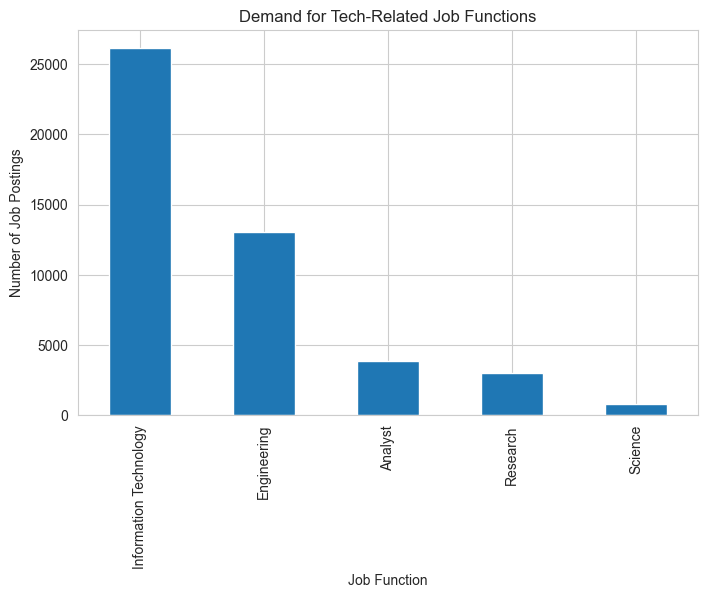

In [10]:
plt.figure(figsize=(8,5))

tech_demand.plot(kind="bar")

plt.title("Demand for Tech-Related Job Functions")
plt.xlabel("Job Function")
plt.ylabel("Number of Job Postings")

plt.show()

## Step 5: Salary Analysis of Tech Roles

In this section, we analyze salary distribution across tech-related job functions.

Objectives:
- Check missing salary data
- Remove missing salary records
- Compare median salary by job function

We use median salary instead of mean because salary data is often skewed by extreme high values.

In [11]:
salary_missing_percentage = tech_master["normalized_salary"].isnull().mean() * 100

print(f"Missing salary data: {salary_missing_percentage:.2f}%")

Missing salary data: 71.11%


### Remove Missing Salary Records

To ensure accurate salary analysis, we remove job postings that do not contain salary information.

In [12]:
salary_data = tech_master.dropna(subset=["normalized_salary"])

print("Rows with salary data:", salary_data.shape[0])

Rows with salary data: 13523


### Median Salary by Job Function

We calculate the median salary for each tech job function to compare compensation levels.

In [13]:
median_salary = (
    salary_data
    .groupby("job_function")["normalized_salary"]
    .median()
    .sort_values(ascending=False)
)

median_salary

job_function
Engineering               120000.0
Information Technology    112500.0
Research                   93600.0
Analyst                    92560.0
Science                    91242.5
Name: normalized_salary, dtype: float64

### Salary Comparison Visualization

The bar chart below visualizes median salary differences across tech job functions.

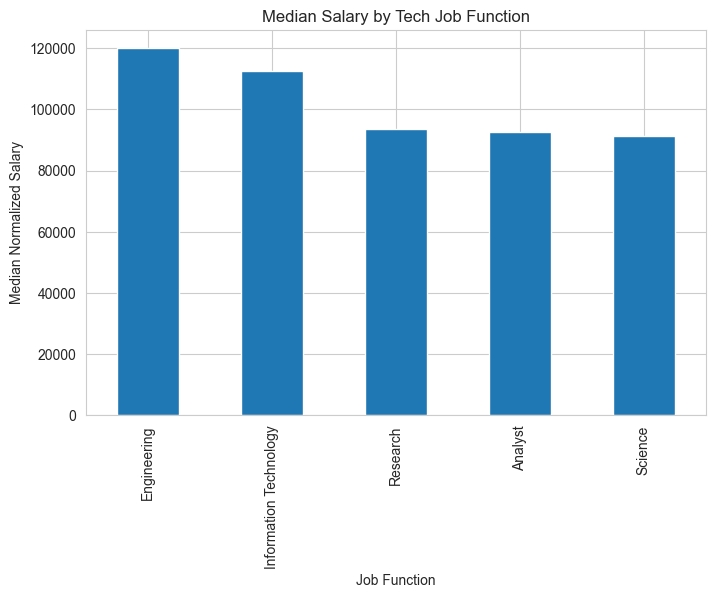

In [14]:
plt.figure(figsize=(8,5))

median_salary.plot(kind="bar")

plt.title("Median Salary by Tech Job Function")
plt.xlabel("Job Function")
plt.ylabel("Median Normalized Salary")

plt.show()

### Remote Work Data Limitation

The `remote_allowed` column contains only one recorded value (1.0) and does not include non-remote job indicators.

Due to insufficient variation in the data, remote work analysis could not be reliably performed and was excluded from this study.

## Step 6: Experience Level Distribution

In this section, we analyze how tech job postings are distributed across different experience levels.

This helps identify whether demand is concentrated in:
- Entry-level roles
- Mid-level roles
- Senior-level roles

In [15]:
tech_master["formatted_experience_level"].isnull().mean() * 100

np.float64(27.102963485246672)

### Distribution of Experience Levels

In [16]:
experience_distribution = (
    tech_master["formatted_experience_level"]
    .value_counts()
)

experience_distribution

formatted_experience_level
Mid-Senior level    18005
Entry level         11016
Associate            3088
Director              997
Internship            749
Executive             263
Name: count, dtype: int64

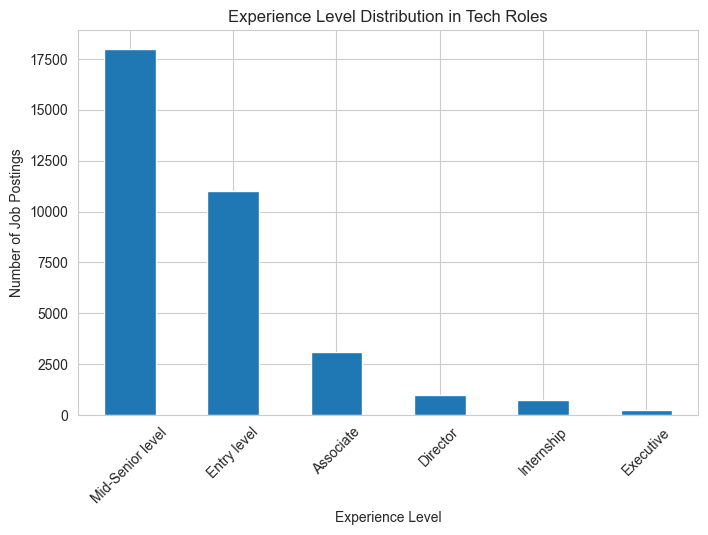

In [17]:
plt.figure(figsize=(8,5))

experience_distribution.plot(kind="bar")

plt.title("Experience Level Distribution in Tech Roles")
plt.xlabel("Experience Level")
plt.ylabel("Number of Job Postings")

plt.xticks(rotation=45)

plt.show()

## Step 7: Salary by Experience Level

In this section, we analyze how salary varies across different experience levels in tech roles.

This helps validate whether higher experience correlates with higher compensation.

In [18]:
salary_experience_data = tech_master.dropna(
    subset=["normalized_salary", "formatted_experience_level"]
)

In [19]:
median_salary_exp = (
    salary_experience_data
    .groupby("formatted_experience_level")["normalized_salary"]
    .median()
    .sort_values(ascending=False)
)

median_salary_exp

formatted_experience_level
Executive           227950.0
Director            195000.0
Mid-Senior level    127350.0
Associate            83200.0
Entry level          79200.0
Internship           52000.0
Name: normalized_salary, dtype: float64

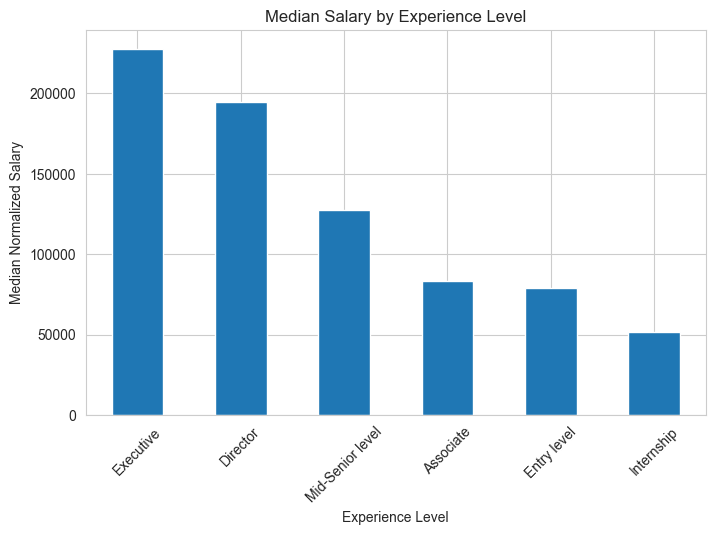

In [20]:
plt.figure(figsize=(8,5))

median_salary_exp.plot(kind="bar")

plt.title("Median Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Median Normalized Salary")

plt.xticks(rotation=45)

plt.show()

## Step 8: Job Function vs Experience Level

In this section, we analyze how experience levels are distributed within each tech job function.

This helps identify whether certain tech fields demand more senior professionals.

In [21]:
function_experience = pd.crosstab(
    tech_master["job_function"],
    tech_master["formatted_experience_level"]
)

function_experience

formatted_experience_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
job_function,,,,,,
Analyst,541,105,592,17,51,1622
Engineering,889,214,3126,63,247,4866
Information Technology,1270,507,6595,146,390,10169
Research,258,114,570,24,51,1045
Science,130,57,133,13,10,303


In [22]:
function_experience_percent = (
    function_experience.div(function_experience.sum(axis=1), axis=0) * 100
)

function_experience_percent

formatted_experience_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
job_function,,,,,,
Analyst,18.476776,3.586066,20.218579,0.580601,1.741803,55.396175
Engineering,9.452419,2.275385,33.237640,0.669856,2.626263,51.738437
Information Technology,6.657231,2.657651,34.570425,0.765319,2.044347,53.305027
Research,12.512124,5.528613,27.643065,1.163919,2.473327,50.678952
Science,20.123839,8.823529,20.588235,2.012384,1.547988,46.904025


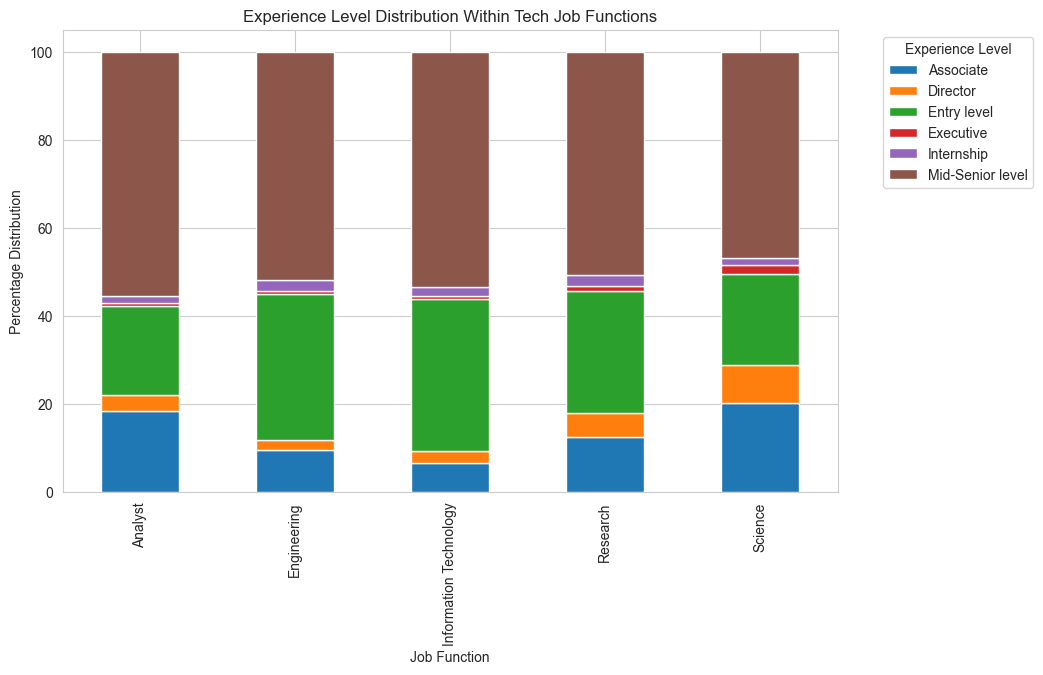

In [23]:
function_experience_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Experience Level Distribution Within Tech Job Functions")
plt.xlabel("Job Function")
plt.ylabel("Percentage Distribution")

plt.legend(title="Experience Level", bbox_to_anchor=(1.05, 1))
plt.show()